# Assignment 5b
Using Naive Bayesian classifier predict river non river using Satellite data set of Hooghly river.   
Submitted by: **IEC2016012**

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio

### Loading dataset

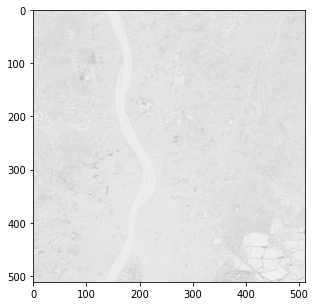

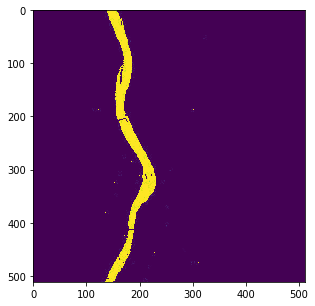

In [2]:
# X = plt.imread("images/1.gif")
# plt.figure(figsize=(5,5))
# plt.imshow(X)
# plt.show()

X1 = imageio.imread("images/1.gif")
X2 = imageio.imread("images/2.gif")
X3 = imageio.imread("images/3.gif")
X4 = imageio.imread("images/4.gif")

# X1 = X1[:,:,0]
# X2 = X2[:,:,0]
# X3 = X3[:,:,0]
# X4 = X4[:,:,0]

X = np.dstack((X1,X2,X3,X4))
plt.figure(figsize=(5,5))
plt.imshow(X)
plt.show()

y = plt.imread("images/PDCV1.jpeg")
plt.figure(figsize=(5,5))
plt.imshow(y)
plt.show()

In [3]:
print(X.shape, y.shape)

(512, 512, 4) (512, 512)


### Plotting images based on pixel value ranges

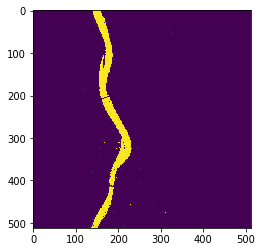

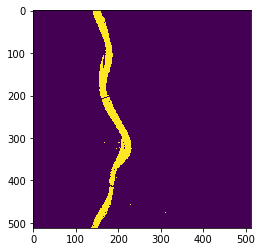

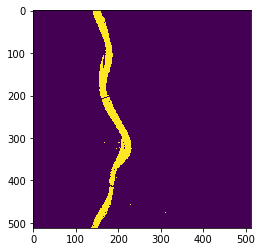

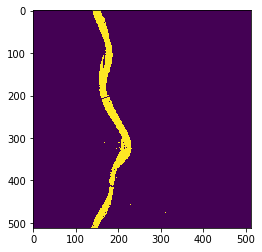

In [4]:
plt.imshow(y)
plt.show()

y_clear = y
y_clear = (y_clear>0.3*255)*1
plt.imshow(y_clear)
plt.show()

y_clear = y
y_clear = (y_clear>0.5*255)*1
plt.imshow(y_clear)
plt.show()

y_clear = y
y_clear = (y_clear>0.9*255)*1
plt.imshow(y_clear)
plt.show()

### Taking a threshold of 0.5 for getting y

In [5]:
y = (y>0.5*255)*1

### Taking 50 random points from river class and 100 random points from non-river class

In [6]:
no_nrpix = np.sum(y==0)
no_rpix = np.sum(y==1)
print(no_nrpix, no_rpix)

252695 9449


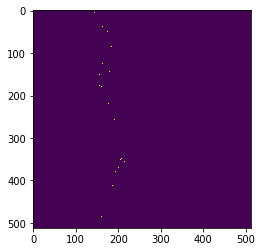

In [7]:
y = y.flatten()

river_mask = np.floor(np.random.rand(50)*no_rpix)
# print(river_mask)
river = []
j = 0
for i in range(len(y)):
    if y[i] == 1:
        j+=1
        if j in river_mask:
            river.append(i)

# print(river)
            
def plot_river(river):
    x = np.zeros(512*512)
    for i in range(len(x)):
        if i in river:
            x[i] = 1
#     print(np.sum(x==1))
    plt.imshow(np.reshape(x,(512,512)))
    plt.show()
    
plot_river(river)

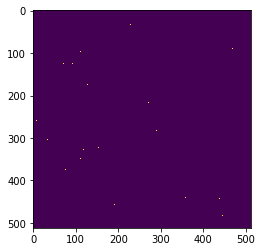

In [8]:
nonriver_mask = np.floor(np.random.rand(100)*no_nrpix)
# print(nonriver_mask)
nonriver = []
j = 0
for i in range(len(y)):
    if y[i] == 0:
        j+=1
        if j in nonriver_mask:
            nonriver.append(i)

# print(nonriver)
            
def plot_nonriver(nonriver):
    x = np.zeros(512*512)
    for i in range(len(x)):
        if i in nonriver:
            x[i] = 1
#     print(np.sum(x==1))
    plt.imshow(np.reshape(x,(512,512)))
    plt.show()
    
plot_nonriver(nonriver)

In [9]:
X = X.reshape(-1,4)
river_class = X[river]
nonriver_class = X[nonriver]
t1 = np.mean(river_class, axis=0)
t2 = np.mean(nonriver_class, axis=0)
print(t1,t2)

cov_river = np.cov(river_class.T)
cov_nonriver = np.cov(nonriver_class.T)
print(cov_river, cov_nonriver)

r1 = np.zeros(512*512)
for i in range(512*512):
    r1[i] = (X[i,:4]-t1)@np.linalg.inv(cov_river)@(X[i,:4]-t1).T
print(r1.shape)

nr1 = np.zeros(512*512)
for i in range(512*512):
    nr1[i] = (X[i,:4]-t2)@np.linalg.inv(cov_river)@(X[i,:4]-t2).T
print(nr1.shape)

[44.26 30.28 31.44 21.44] [41.04 25.98 26.66 34.11]
[[ 0.93102041  0.53795918  0.14857143  0.29142857]
 [ 0.53795918  0.85877551  0.40489796 -0.28897959]
 [ 0.14857143  0.40489796  0.57795918 -0.07510204]
 [ 0.29142857 -0.28897959 -0.07510204  2.12897959]] [[ 8.52363636  7.47555556 11.17535354  4.92484848]
 [ 7.47555556  7.75717172 11.51838384  8.19414141]
 [11.17535354 11.51838384 20.65090909 12.09838384]
 [ 4.92484848  8.19414141 12.09838384 44.66454545]]
(262144,)
(262144,)


In [10]:
m = 50#len(r1)
p1 = 1/(  ((np.sqrt(2*np.pi))**m) * np.sqrt(np.linalg.det(cov_river))     )*np.exp(-1/2*r1)

m = 100#len(r1)
p2 = 1/(  ((np.sqrt(2*np.pi))**m) * np.sqrt(np.linalg.det(cov_nonriver))     )*np.exp(-1/2*nr1)

print(p1)
print(p2)

# p1 = -0.5/np.sqrt(np.linalg.det(cov_river))*np.exp(r1)
# p2 = -0.5/np.sqrt(np.linalg.det(cov_nonriver))*np.exp(nr1)

[1.69116889e-099 6.78532483e-078 8.39171201e-095 ... 2.64843513e-076
 7.08678637e-106 5.34337876e-077]
[3.50057205e-55 3.44804773e-51 6.68339160e-53 ... 3.33725474e-69
 1.44893047e-69 2.55556595e-76]


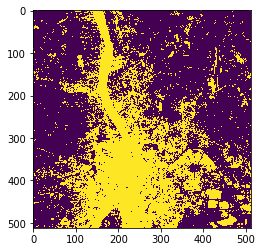

In [11]:
P1 = 0.3
P2 = 0.7

out_image = (P1*p1>=P2*p2)*255
plt.imshow(out_image.reshape(512,512))
plt.show()

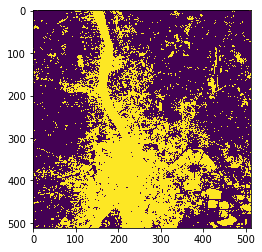

In [12]:
P1 = 0.7
P2 = 0.3

out_image = (P1*p1>=P2*p2)*255
plt.imshow(out_image.reshape(512,512))
plt.show()

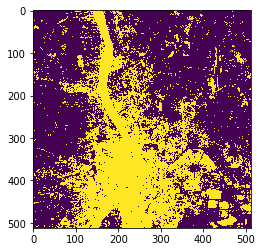

In [13]:
P1 = 0.5
P2 = 0.5

out_image = (P1*p1>=P2*p2)*255
plt.imshow(out_image.reshape(512,512))
plt.show()

## Conclusion
Using Naive Bayesian classifier, river non-river classes were predicted using Satellite data set of Hooghly river. Firstly the coordinates were taken and divided into 2 classes: river and non-river. Then 50 river points were taken and 100 non-river points were taken due to computational complexity and used to train the classifier. The covariance matrix was calculated for either class and is used to predict the whole image using the trained classifier.   